In [2]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import Bloch, about, basis, mesolve, sigmam, sigmax, sigmay, sigmaz

%matplotlib inline

Basic Hamiltonian $\sigma_z$
$$ H = \frac{\Delta}{2} \sigma_x$$
collapse operator
$$C = \sqrt{g}\sigma_z$$
g is dissipation coefficient

In [3]:
# coefficients
delta = 2 * np.pi
g = 0.25

# hamiltonian
H = delta / 2.0 * sigmax()

# list of collapse operators
c_ops = [np.sqrt(g) * sigmaz()]

# initial state
psi0 = basis(2, 0)

# times
tlist = np.linspace(0, 5, 100)

In [4]:
res = mesolve(H, psi0, tlist, c_ops, [sigmaz()])

c:\Users\Tommy\OneDrive - Durham University\level 4 Project\L4 code directory\.venv\Lib\site-packages\qutip\solver\solver_base.py:583: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


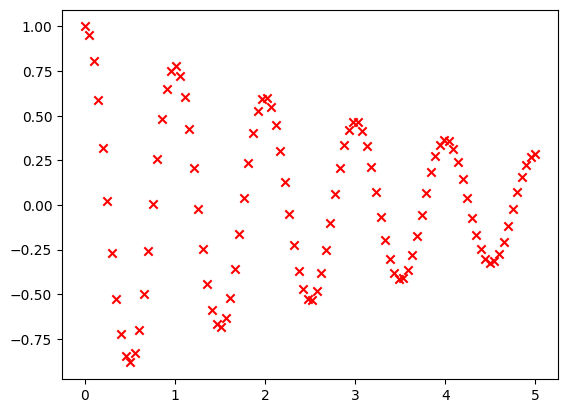

In [7]:

plt.scatter(tlist, res.expect[0], c='r', marker='x')
plt.show()

Dynamics on a Bloch sphere
$$H = \Delta (cos(\theta)\sigma_z+sin(\theta)\sigma_z)$$

In [9]:
theta = 0.2 * np.pi

H = delta * (np.cos(theta) * sigmaz() + np.sin(theta) * sigmax())

tlist = np.linspace(0, 5, 1000)
result = mesolve(H, psi0, tlist, [], [sigmax(), sigmay(), sigmaz()])


c:\Users\Tommy\OneDrive - Durham University\level 4 Project\L4 code directory\.venv\Lib\site-packages\qutip\solver\solver_base.py:583: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


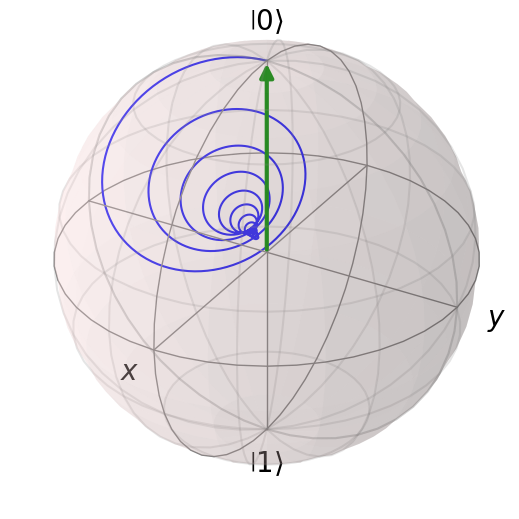

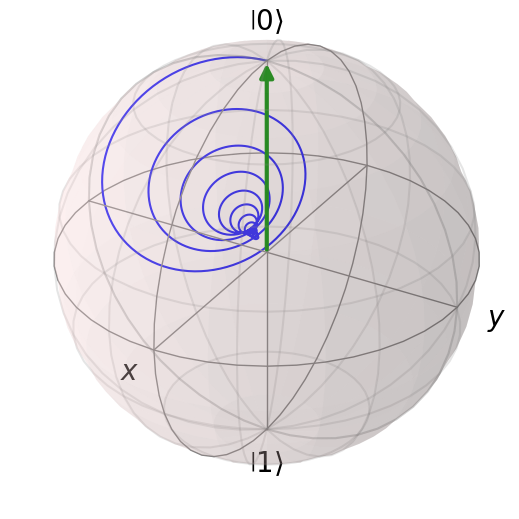

In [12]:
gamma_phase = 0.5
c_ops = [np.sqrt(gamma_phase) * sigmaz()]

result = mesolve(H, psi0, tlist, c_ops, [sigmax(), sigmay(), sigmaz()])

# extract expectation values
exp_sx_dephase, exp_sy_dephase, exp_sz_dephase = result.expect

# convert to numpy arrays
exp_sx_dephase, exp_sy_dephase, exp_sz_dephase = (
    np.array(exp_sx_dephase),
    np.array(exp_sy_dephase),
    np.array(exp_sz_dephase),
)

sphere = Bloch()
sphere.add_points([exp_sx_dephase, exp_sy_dephase, exp_sz_dephase], meth="l")
sphere.add_states(psi0)
sphere.show()

In [ ]:
gamma_relax = 0.5
c_ops = [np.sqrt(gamma_relax)]